# NER

## データ準備

- NERのサンプルデータを、RNNで学習できる形に処理する
    - データのロード: 'ner_dataset_sentence.txt', 'ner_dataset_labels.txt'
    - ラベルのエンコード: ラベルを数値化
    - 辞書作成
    - 文章を単語IDにエンコード
    - 学習データとテストデータに分割
- 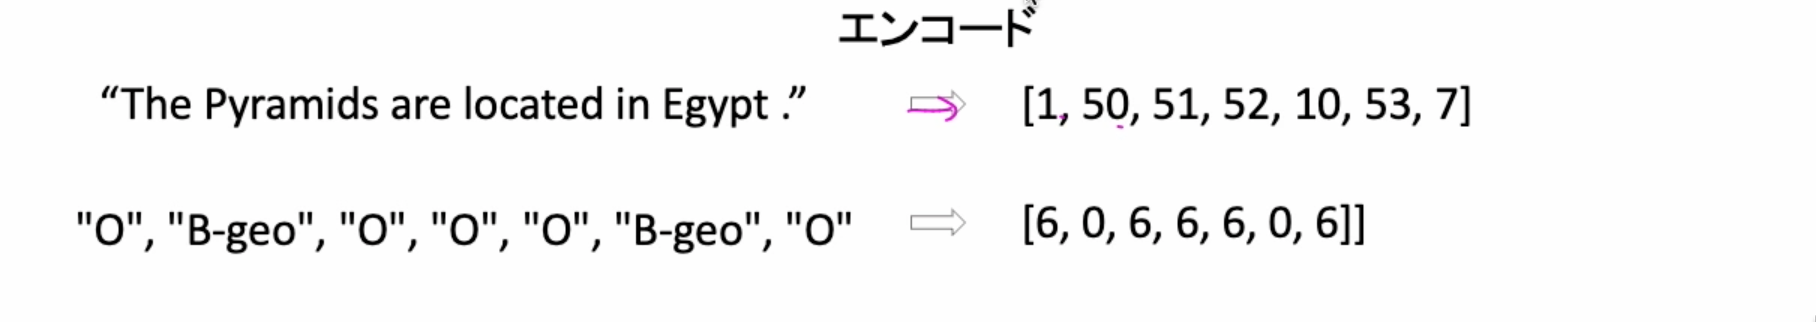

In [1]:
import pickle
def load_dataset(sentences_file_name='ner_dataset_sentences.txt', labels_file_name='ner_dataset_labels.txt'):    
    with open(sentences_file_name, 'rb') as fp:
        sentences = pickle.load(fp)
    with open(labels_file_name, 'rb') as fp:
        labels = pickle.load(fp)
    return sentences, labels

In [2]:
sentences, labels = load_dataset()

In [3]:
sentences[:10]

['The cat sat on the mat .',
 'John lives in New York .',
 'I have two dogs .',
 'She works at Google .',
 'The Eiffel Tower is in Paris .',
 'He is from Spain .',
 'I visited the Great Wall of China .',
 'She is studying at Oxford University .',
 'He works for the United Nations .',
 'Berlin is the capital of Germany .']

In [4]:
labels[:10]

[['O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['B-per', 'O', 'O', 'B-geo', 'I-geo', 'O'],
 ['O', 'O', 'O', 'O', 'O'],
 ['O', 'O', 'O', 'B-org', 'O'],
 ['O', 'B-geo', 'I-geo', 'O', 'O', 'B-geo', 'O'],
 ['O', 'O', 'O', 'B-geo', 'O'],
 ['O', 'O', 'O', 'B-geo', 'I-geo', 'I-geo', 'I-geo', 'O'],
 ['O', 'O', 'O', 'O', 'B-org', 'I-org', 'O'],
 ['O', 'O', 'O', 'O', 'B-org', 'I-org', 'O'],
 ['B-geo', 'O', 'O', 'O', 'O', 'B-geo', 'O']]

## ラベルエンコード

In [15]:
from sklearn.preprocessing import LabelEncoder
all_labels = [label for sublist in labels for label in sublist]
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)
encoded_labels = [label_encoder.transform(label) for label in labels]

In [16]:
[label for sublist in labels for label in sublist]

['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-per',
 'O',
 'O',
 'B-geo',
 'I-geo',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-org',
 'O',
 'O',
 'B-geo',
 'I-geo',
 'O',
 'O',
 'B-geo',
 'O',
 'O',
 'O',
 'O',
 'B-geo',
 'O',
 'O',
 'O',
 'O',
 'B-geo',
 'I-geo',
 'I-geo',
 'I-geo',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-org',
 'I-org',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-org',
 'I-org',
 'O',
 'B-geo',
 'O',
 'O',
 'O',
 'O',
 'B-geo',
 'O',
 'B-geo',
 'I-geo',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-geo',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-geo',
 'O',
 'O',
 'O',
 'B-geo',
 'O',
 'O',
 'B-geo',
 'O',
 'O',
 'O',
 'B-geo',
 'O',
 'O',
 'O',
 'O',
 'B-org',
 'O',
 'O',
 'O',
 'O',
 'B-geo',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-geo',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-geo',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-org',
 'O',
 'B-per',
 'I-per',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-per',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-

In [17]:
encoded_labels

[array([6, 6, 6, 6, 6, 6, 6]),
 array([2, 6, 6, 0, 3, 6]),
 array([6, 6, 6, 6, 6]),
 array([6, 6, 6, 1, 6]),
 array([6, 0, 3, 6, 6, 0, 6]),
 array([6, 6, 6, 0, 6]),
 array([6, 6, 6, 0, 3, 3, 3, 6]),
 array([6, 6, 6, 6, 1, 4, 6]),
 array([6, 6, 6, 6, 1, 4, 6]),
 array([0, 6, 6, 6, 6, 0, 6]),
 array([0, 3, 6, 6, 6, 6, 6, 6, 6, 6]),
 array([6, 0, 6, 6, 6, 6, 6, 6, 6, 6]),
 array([6, 0, 6, 6, 6, 0, 6]),
 array([6, 0, 6, 6, 6, 0, 6]),
 array([6, 6, 6, 1, 6]),
 array([6, 6, 6, 0, 6]),
 array([6, 6, 6, 6, 0, 6, 6, 6, 6]),
 array([6, 0, 6, 6, 6, 6, 6]),
 array([6, 6, 6, 1, 6]),
 array([2, 5, 6, 6, 6, 6, 6]),
 array([2, 6, 6, 6, 6, 6, 6, 6]),
 array([2, 5, 6, 6, 6, 6]),
 array([6, 0, 3, 3, 3, 6, 6, 0, 6]),
 array([6, 0, 3, 3, 6, 6, 0, 6]),
 array([6, 6, 6, 1, 6]),
 array([6, 0, 3, 6, 6, 0, 6]),
 array([6, 6, 6, 6, 6, 1, 4, 4, 6]),
 array([6, 6, 6, 0, 3, 6]),
 array([6, 6, 6, 0, 6, 6, 6]),
 array([6, 6, 6, 6, 1, 4, 4, 6])]

## 辞書作成とエンコード

In [18]:
# 下記の辞書を作成する：　1単語ごとに取ってきてdictionaryの形にする
sentences

['The cat sat on the mat .',
 'John lives in New York .',
 'I have two dogs .',
 'She works at Google .',
 'The Eiffel Tower is in Paris .',
 'He is from Spain .',
 'I visited the Great Wall of China .',
 'She is studying at Oxford University .',
 'He works for the United Nations .',
 'Berlin is the capital of Germany .',
 'Mount Everest is the highest peak in the world .',
 'The Nile is the longest river in the world .',
 'The Pyramids are located in Egypt .',
 'The Sahara desert is in Africa .',
 'I work at Microsoft .',
 'She is from Australia .',
 'He is going to Paris for a meeting .',
 'The Amazon is the largest rainforest .',
 'He studied at Harvard .',
 'Mona Lisa is a famous painting .',
 'Shakespeare is known for Romeo and Juliet .',
 'Albert Einstein was a physicist .',
 'The Leaning Tower of Pisa is in Italy .',
 'The Great Barrier Reef is in Australia .',
 'She works at Facebook .',
 'The Grand Canyon is in Arizona .',
 'She is studying at the University of Tokyo .',
 'He 

In [19]:
sentences[0].split()

['The', 'cat', 'sat', 'on', 'the', 'mat', '.']

In [20]:
for sentence in sentences:
    for word in sentence.split():
        print(word)

The
cat
sat
on
the
mat
.
John
lives
in
New
York
.
I
have
two
dogs
.
She
works
at
Google
.
The
Eiffel
Tower
is
in
Paris
.
He
is
from
Spain
.
I
visited
the
Great
Wall
of
China
.
She
is
studying
at
Oxford
University
.
He
works
for
the
United
Nations
.
Berlin
is
the
capital
of
Germany
.
Mount
Everest
is
the
highest
peak
in
the
world
.
The
Nile
is
the
longest
river
in
the
world
.
The
Pyramids
are
located
in
Egypt
.
The
Sahara
desert
is
in
Africa
.
I
work
at
Microsoft
.
She
is
from
Australia
.
He
is
going
to
Paris
for
a
meeting
.
The
Amazon
is
the
largest
rainforest
.
He
studied
at
Harvard
.
Mona
Lisa
is
a
famous
painting
.
Shakespeare
is
known
for
Romeo
and
Juliet
.
Albert
Einstein
was
a
physicist
.
The
Leaning
Tower
of
Pisa
is
in
Italy
.
The
Great
Barrier
Reef
is
in
Australia
.
She
works
at
Facebook
.
The
Grand
Canyon
is
in
Arizona
.
She
is
studying
at
the
University
of
Tokyo
.
He
lives
in
Los
Angeles
.
They
are
visiting
London
this
summer
.
He
works
for
the
World
Health
Organization
.


In [21]:
word2idx = {}
word2idx[sentences[0].split()[0]] = len(word2idx)

In [22]:
word2idx

{'The': 0}

In [23]:
word2idx.setdefault('apple', 3)

3

In [24]:
word2idx.setdefault('The', 3)

0

In [25]:
# setdefaultを使うことで単語を数値化することができる
for sentence in sentences:
    print([word2idx.setdefault(word, len(word2idx)) for word in sentence.split()])

[0, 2, 3, 4, 5, 6, 7]
[8, 9, 10, 11, 12, 7]
[13, 14, 15, 16, 7]
[17, 18, 19, 20, 7]
[0, 21, 22, 23, 10, 24, 7]
[25, 23, 26, 27, 7]
[13, 28, 5, 29, 30, 31, 32, 7]
[17, 23, 33, 19, 34, 35, 7]
[25, 18, 36, 5, 37, 38, 7]
[39, 23, 5, 40, 31, 41, 7]
[42, 43, 23, 5, 44, 45, 10, 5, 46, 7]
[0, 47, 23, 5, 48, 49, 10, 5, 46, 7]
[0, 50, 51, 52, 10, 53, 7]
[0, 54, 55, 23, 10, 56, 7]
[13, 57, 19, 58, 7]
[17, 23, 26, 59, 7]
[25, 23, 60, 61, 24, 36, 62, 63, 7]
[0, 64, 23, 5, 65, 66, 7]
[25, 67, 19, 68, 7]
[69, 70, 23, 62, 71, 72, 7]
[73, 23, 74, 36, 75, 76, 77, 7]
[78, 79, 80, 62, 81, 7]
[0, 82, 22, 31, 83, 23, 10, 84, 7]
[0, 29, 85, 86, 23, 10, 59, 7]
[17, 18, 19, 87, 7]
[0, 88, 89, 23, 10, 90, 7]
[17, 23, 33, 19, 5, 35, 31, 91, 7]
[25, 9, 10, 92, 93, 7]
[94, 51, 95, 96, 97, 98, 7]
[25, 18, 36, 5, 99, 100, 101, 7]


In [26]:
# 辞書の初期化
word2idx = {"<PAD>": 0}

# 文章ごとに単語の数値化
encoded_sentences = []
for sentence in sentences:
    # print([word2idx.setdefault(word, len(word2idx)) for word in sentence.split()])
    encoded_sentence = [word2idx.setdefault(word, len(word2idx)) for word in sentence.split()]
    encoded_sentences.append(encoded_sentence)

In [27]:
# 文脈のエンコード
encoded_sentences

[[1, 2, 3, 4, 5, 6, 7],
 [8, 9, 10, 11, 12, 7],
 [13, 14, 15, 16, 7],
 [17, 18, 19, 20, 7],
 [1, 21, 22, 23, 10, 24, 7],
 [25, 23, 26, 27, 7],
 [13, 28, 5, 29, 30, 31, 32, 7],
 [17, 23, 33, 19, 34, 35, 7],
 [25, 18, 36, 5, 37, 38, 7],
 [39, 23, 5, 40, 31, 41, 7],
 [42, 43, 23, 5, 44, 45, 10, 5, 46, 7],
 [1, 47, 23, 5, 48, 49, 10, 5, 46, 7],
 [1, 50, 51, 52, 10, 53, 7],
 [1, 54, 55, 23, 10, 56, 7],
 [13, 57, 19, 58, 7],
 [17, 23, 26, 59, 7],
 [25, 23, 60, 61, 24, 36, 62, 63, 7],
 [1, 64, 23, 5, 65, 66, 7],
 [25, 67, 19, 68, 7],
 [69, 70, 23, 62, 71, 72, 7],
 [73, 23, 74, 36, 75, 76, 77, 7],
 [78, 79, 80, 62, 81, 7],
 [1, 82, 22, 31, 83, 23, 10, 84, 7],
 [1, 29, 85, 86, 23, 10, 59, 7],
 [17, 18, 19, 87, 7],
 [1, 88, 89, 23, 10, 90, 7],
 [17, 23, 33, 19, 5, 35, 31, 91, 7],
 [25, 9, 10, 92, 93, 7],
 [94, 51, 95, 96, 97, 98, 7],
 [25, 18, 36, 5, 99, 100, 101, 7]]

In [28]:
# 辞書
word2idx

{'<PAD>': 0,
 'The': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'the': 5,
 'mat': 6,
 '.': 7,
 'John': 8,
 'lives': 9,
 'in': 10,
 'New': 11,
 'York': 12,
 'I': 13,
 'have': 14,
 'two': 15,
 'dogs': 16,
 'She': 17,
 'works': 18,
 'at': 19,
 'Google': 20,
 'Eiffel': 21,
 'Tower': 22,
 'is': 23,
 'Paris': 24,
 'He': 25,
 'from': 26,
 'Spain': 27,
 'visited': 28,
 'Great': 29,
 'Wall': 30,
 'of': 31,
 'China': 32,
 'studying': 33,
 'Oxford': 34,
 'University': 35,
 'for': 36,
 'United': 37,
 'Nations': 38,
 'Berlin': 39,
 'capital': 40,
 'Germany': 41,
 'Mount': 42,
 'Everest': 43,
 'highest': 44,
 'peak': 45,
 'world': 46,
 'Nile': 47,
 'longest': 48,
 'river': 49,
 'Pyramids': 50,
 'are': 51,
 'located': 52,
 'Egypt': 53,
 'Sahara': 54,
 'desert': 55,
 'Africa': 56,
 'work': 57,
 'Microsoft': 58,
 'Australia': 59,
 'going': 60,
 'to': 61,
 'a': 62,
 'meeting': 63,
 'Amazon': 64,
 'largest': 65,
 'rainforest': 66,
 'studied': 67,
 'Harvard': 68,
 'Mona': 69,
 'Lisa': 70,
 'famous': 71,
 'painti

## 学習データと検証データ分割

In [29]:
from sklearn.model_selection import train_test_split

# 元の文章を見たい時、引数にsentencesを渡すと良い
X_train, X_val, y_train, y_val, train_sentences, val_sentences = train_test_split(encoded_sentences, encoderd_labels, sentences, test_size=0.2, random_state=42)

In [30]:
# 元の文章のラベルと元の文章を確認
print(X_train[:3])
print(train_sentences[:3])

[[94, 51, 95, 96, 97, 98, 7], [17, 18, 19, 87, 7], [1, 50, 51, 52, 10, 53, 7]]
['They are visiting London this summer .', 'She works at Facebook .', 'The Pyramids are located in Egypt .']


## padding

- torch.nn.utils.pad_sequenceを使ってリスト内のtensorをpaddingして長さを揃える
    - sequences: tensorのリスト
    - batch_first: 想定するデータの形状が[batch_size, sequence_size]の場合はTrue(デフォルトはFalseであることに注意する)
    - padding_value: paddinする際に使う値(デフォルトでは0.0)
    - 出力は、stackされたtensor

In [31]:
import torch
from torch.nn.utils.rnn import pad_sequence

seq1 = torch.tensor([1, 2, 3])
seq2 = torch.tensor([4, 5])
seq3 = torch.tensor([6, 7, 8, 9])

sequences = [seq1, seq2, seq3]
padded_sequences = pad_sequence(sequences, batch_first=True)

In [32]:
# 長さが違うのてconcatinateできない.そのため、paddingの処理が必要。
torch.cat(sequences, dim=1)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [33]:
# paddingしたsentenceは0が格納され同じ長さのtensorになっているのがわかる。
print(f'sequences: {sequences}')
print(f'padded_sequence: {padded_sequenceｓ}')

sequences: [tensor([1, 2, 3]), tensor([4, 5]), tensor([6, 7, 8, 9])]
padded_sequence: tensor([[1, 2, 3, 0],
        [4, 5, 0, 0],
        [6, 7, 8, 9]])


In [34]:
# paddingしtensor化
# 適切にpaddingされて長さが等しくなっている
X_train = pad_sequence([torch.tensor(x) for x in X_train], batch_first=True)
print(X_train.shape)
print(X_train)

torch.Size([24, 10])
tensor([[ 94,  51,  95,  96,  97,  98,   7,   0,   0,   0],
        [ 17,  18,  19,  87,   7,   0,   0,   0,   0,   0],
        [  1,  50,  51,  52,  10,  53,   7,   0,   0,   0],
        [  1,   2,   3,   4,   5,   6,   7,   0,   0,   0],
        [  1,  21,  22,  23,  10,  24,   7,   0,   0,   0],
        [ 25,  23,  60,  61,  24,  36,  62,  63,   7,   0],
        [ 25,  23,  26,  27,   7,   0,   0,   0,   0,   0],
        [  1,  54,  55,  23,  10,  56,   7,   0,   0,   0],
        [  1,  47,  23,   5,  48,  49,  10,   5,  46,   7],
        [  1,  82,  22,  31,  83,  23,  10,  84,   7,   0],
        [  8,   9,  10,  11,  12,   7,   0,   0,   0,   0],
        [ 13,  14,  15,  16,   7,   0,   0,   0,   0,   0],
        [  1,  88,  89,  23,  10,  90,   7,   0,   0,   0],
        [ 17,  18,  19,  20,   7,   0,   0,   0,   0,   0],
        [ 78,  79,  80,  62,  81,   7,   0,   0,   0,   0],
        [ 17,  23,  33,  19,   5,  35,  31,  91,   7,   0],
        [ 25,  67, 

In [35]:
# 学習/検証データをpaddingしtensor化
X_train = pad_sequence([torch.tensor(x) for x in X_train], batch_first=True)
X_val = pad_sequence([torch.tensor(x) for x in X_val], batch_first=True)
y_train = pad_sequence([torch.tensor(y) for y in y_train], batch_first=True)
y_val = pad_sequence([torch.tensor(y) for y in y_val], batch_first=True)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

torch.Size([24, 10]) torch.Size([6, 8]) torch.Size([24, 10]) torch.Size([6, 8])


/tmp/ipykernel_233/2330879923.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = pad_sequence([torch.tensor(x) for x in X_train], batch_first=True)


## NERをを学習するモデルを実装

- モデルクラスを作成する
    - 以下の層を持つ(前回作成したModelクラスを変更する)
        - 入力層：word embeddingを行うembedding層
        - 隠れ層：引数に合わせてLSTM, GRU, RNNのユニット
        - 出力層：全結合層
            - 今回はmany-to-manyの形になるので、全Stepの隠れ状態を使用することに注意

In [36]:
import torch.nn as nn
class Model(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, output_size, num_layers=1, rnn_type='LSTM', bidirectional=False):

        super().__init__()
        self.num_directions = 2 if bidirectional else 1
        
        # embedding layer追加 (vocab_size x embedding_dim)
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        input_size = embedding_dim
        
        if rnn_type == 'RNN':
            self.rnn = nn.RNN(input_size, hidden_size, num_layers=num_layers, batch_first=True, bidirectional=bidirectional)
        elif rnn_type == 'LSTM':
            self.rnn = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True, bidirectional=bidirectional)
        elif rnn_type == 'GRU':
            self.rnn = nn.GRU(input_size, hidden_size, num_layers=num_layers, batch_first=True, bidirectional=bidirectional)
        else:
            raise ValueError('Unsupported RNN type. Choose from ["LSTM", "RNN", "GRU", "UGRNN"]')
            
        self.fc = nn.Linear(hidden_size*self.num_directions, output_size)

    def forward(self, x):
        x = self.embedding(x)
        output_seq, _ = self.rnn(x)

        # many to many の場合は，
        # output_seq: [batch_size, seq_len, hidden_size*num_directions]
        out = self.fc(output_seq)
        return out

In [37]:
import torch
# BiRNNのテスト
# input_size = 10
vocab_size = 300
embedding_dim = 50  # 300words -> 50dim
hidden_size = 3
batch_size = 24 # X_trainはtorch.Size([24, 10])
seq_len = 10 # X_trainはtorch.Size([24, 10])
output_size = 3 # 3クラス分類

# サンプルのTensor
# input_tensor = torch.randn(batch_size, seq_len, vocab_size)
model = Model(vocab_size, embedding_dim, hidden_size, output_size, bidirectional=True, )
out = model(X_train)

In [38]:
out.shape

torch.Size([24, 10, 3])

In [39]:
# 各行はそれぞれの単語についての確率(10行)
# 各列は3クラス分類で各クラスの確率になる(3列)

out[0]

tensor([[-0.2732, -0.1057,  0.0062],
        [-0.1984,  0.0041, -0.0039],
        [-0.3157,  0.0705, -0.0287],
        [-0.2000, -0.0494,  0.0215],
        [-0.0581,  0.0786,  0.1920],
        [-0.2473, -0.0905,  0.3438],
        [ 0.0110,  0.1781,  0.0339],
        [-0.1832, -0.1147,  0.1875],
        [-0.1395, -0.1112,  0.2127],
        [-0.0951, -0.0877,  0.2188]], grad_fn=<SelectBackward0>)

In [40]:
train_sentences[0]

'They are visiting London this summer .'

## 学習ループ

学習ループ

- TensorDataseとDataLoaderクラスを使用してDatasetとDataLoaderを作成する
    - tensorDatasetはDatasetクラスの実装の一つで、既存のTensorを簡単にDatasetとして使用可能にする
- OptimizerにはAdamを使用する
- バッチサイズは3とする
- 損失関数には多クラス分類の交差エントロピーを使用する
    - padding用のラベルは損失としてカウントしないようにする

In [81]:
from torch.utils.data import DataLoader, TensorDataset
vocab_size = len(word2idx)
num_classes = len(label_encoder.classes_)  # 7クラス問題
embedding_dim = 50
hidden_size = 40
output_size = num_classes
batch_size = 3
learning_rate = 0.003
num_epochs = 40

# モデル作成
model = Model(vocab_size, embedding_dim, hidden_size, output_size, num_layers=1, rnn_type='LSTM', bidirectional=True)

# Data Loader作成
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# 損失関数とOptimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss(ignore_index=0)

# 学習ループ
# 1. 深層学習の学習ループは手持ちの学習データを何周もして学習していく。その1周をエポックと呼ぶ.
for epoch in range(num_epochs):
    # 学習には学習モード、評価モード、検証モードがある。それによってモデルのレイヤーの挙動が変わる
    # 2. 学習モードの宣言
    model.train()
    train_loss = 0
    # 3. DataLoaderからデータを取ってくる
    for i, (sentences, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        
        outputs = model(sentences)
        loss = criterion(outputs.view(-1, num_classes), labels.view(-1))

        # 4. backwardでAutogradする
        loss.backward()
        
        optimizer.step()
        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Average Training Loss: {avg_train_loss:.4f}")

    # 検証データを使用して未知のデータに対してもlossが下がっているか確認する
    # 5.検証モードの宣言
    model.eval()
    val_loss = 0
    total_samples = 0
    total_correct = 0
    # 6. 検証データでもDataLoaderからデータを取ってくる
    for sentences, labels in val_loader:
        # optimizer.zero_grad()  # パラメータの更新は不要
        
        outputs = model(sentences)
        loss = criterion(outputs.view(-1, num_classes), labels.view(-1))
        
        # loss.backward() # backwardも不要
        
        # optimizer.step() # 推論を回すだけなのでパラメータの更新は不要
        val_loss += loss.item()

        # accuracy計算
        _, predicted = torch.max(outputs, dim=-1)
        # Padding部分を除外するマスクを作成
        non_pad_elements = labels != 0
        # Paddingを除いた予測結果とラベルを比較し、正解数をカウント
        total_correct += (predicted[non_pad_elements] == labels[non_pad_elements]).sum().item()
        # 正確なサンプル数（Paddingを除いた要素数）をカウント
        total_samples += non_pad_elements.sum().item()

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = total_correct / total_samples
    print(f"Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

Epoch 1/40, Average Training Loss: 1.8147
Val Loss: 1.5265, Val Accuracy: 0.8182
Epoch 2/40, Average Training Loss: 1.1761
Val Loss: 0.8480, Val Accuracy: 0.8485
Epoch 3/40, Average Training Loss: 0.6939
Val Loss: 0.6122, Val Accuracy: 0.8485
Epoch 4/40, Average Training Loss: 0.5526
Val Loss: 0.5581, Val Accuracy: 0.8485
Epoch 5/40, Average Training Loss: 0.4128
Val Loss: 0.5441, Val Accuracy: 0.8182
Epoch 6/40, Average Training Loss: 0.3430
Val Loss: 0.5285, Val Accuracy: 0.7879
Epoch 7/40, Average Training Loss: 0.2605
Val Loss: 0.4961, Val Accuracy: 0.7879
Epoch 8/40, Average Training Loss: 0.1943
Val Loss: 0.4874, Val Accuracy: 0.8182
Epoch 9/40, Average Training Loss: 0.1370
Val Loss: 0.4668, Val Accuracy: 0.8182
Epoch 10/40, Average Training Loss: 0.0986
Val Loss: 0.4487, Val Accuracy: 0.8182
Epoch 11/40, Average Training Loss: 0.0726
Val Loss: 0.4507, Val Accuracy: 0.8485
Epoch 12/40, Average Training Loss: 0.0581
Val Loss: 0.4568, Val Accuracy: 0.8485
Epoch 13/40, Average Trai

In [96]:
# [バッチサイズ、文の長さ、7クラス分類]
for i, (sentences, labels) in enumerate(train_loader):
    outputs = model(sentences)
    print(outputs.shape)

torch.Size([3, 10, 7])
torch.Size([3, 10, 7])
torch.Size([3, 10, 7])
torch.Size([3, 10, 7])
torch.Size([3, 10, 7])
torch.Size([3, 10, 7])
torch.Size([3, 10, 7])
torch.Size([3, 10, 7])


In [74]:
# .view(-1)を使ってbatch_size=3*sentences=10のデータを3x10->30のデータにする
print(labels.shape)
print(labels.view(-1).shape)
print(outputs.shape)
print(outputs.view(-1, num_classes).shape)

torch.Size([3, 10])
torch.Size([30])
torch.Size([3, 10, 7])
torch.Size([30, 7])


In [66]:
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)

# iterで返す
for _ in range(5):
    print(next(iter(train_loader)))

[tensor([[ 1, 50, 51, 52, 10, 53,  7,  0,  0,  0],
        [ 1,  2,  3,  4,  5,  6,  7,  0,  0,  0],
        [78, 79, 80, 62, 81,  7,  0,  0,  0,  0]]), tensor([[6, 0, 6, 6, 6, 0, 6, 0, 0, 0],
        [6, 6, 6, 6, 6, 6, 6, 0, 0, 0],
        [2, 5, 6, 6, 6, 6, 0, 0, 0, 0]])]
[tensor([[17, 23, 33, 19, 34, 35,  7,  0,  0,  0],
        [ 8,  9, 10, 11, 12,  7,  0,  0,  0,  0],
        [ 1, 50, 51, 52, 10, 53,  7,  0,  0,  0]]), tensor([[6, 6, 6, 6, 1, 4, 6, 0, 0, 0],
        [2, 6, 6, 0, 3, 6, 0, 0, 0, 0],
        [6, 0, 6, 6, 6, 0, 6, 0, 0, 0]])]
[tensor([[ 8,  9, 10, 11, 12,  7,  0,  0,  0,  0],
        [ 1, 47, 23,  5, 48, 49, 10,  5, 46,  7],
        [ 1, 50, 51, 52, 10, 53,  7,  0,  0,  0]]), tensor([[2, 6, 6, 0, 3, 6, 0, 0, 0, 0],
        [6, 0, 6, 6, 6, 6, 6, 6, 6, 6],
        [6, 0, 6, 6, 6, 0, 6, 0, 0, 0]])]
[tensor([[ 1, 82, 22, 31, 83, 23, 10, 84,  7,  0],
        [13, 28,  5, 29, 30, 31, 32,  7,  0,  0],
        [ 1,  2,  3,  4,  5,  6,  7,  0,  0,  0]]), tensor([[6, 0, 3, 3, 3

## 検証データの出力確認

- 分割したX_valとVal_sentencesを使ってモデルの出力を確認する
- LabelEncoderのインスタンスに対して.inverse_transformメソッドを使用することで、ラベルのindexからラベルを逆引きできる
- padding分は不要なので出力しないようにする

In [82]:
model.eval()
val_outputs = model(X_val)

In [85]:
print(X_val)
print(val_sentences)

tensor([[25,  9, 10, 92, 93,  7,  0,  0],
        [17, 23, 26, 59,  7,  0,  0,  0],
        [ 1, 29, 85, 86, 23, 10, 59,  7],
        [ 1, 64, 23,  5, 65, 66,  7,  0],
        [25, 18, 36,  5, 37, 38,  7,  0],
        [39, 23,  5, 40, 31, 41,  7,  0]])
['He lives in Los Angeles .', 'She is from Australia .', 'The Great Barrier Reef is in Australia .', 'The Amazon is the largest rainforest .', 'He works for the United Nations .', 'Berlin is the capital of Germany .']


In [86]:
_, predicted_labels = torch.max(val_outputs, dim=-1)

In [88]:
predicted_labels

tensor([[6, 6, 6, 6, 6, 6, 6, 6],
        [6, 6, 6, 6, 6, 6, 6, 6],
        [6, 6, 3, 6, 6, 6, 6, 6],
        [6, 6, 6, 6, 6, 1, 6, 6],
        [6, 6, 6, 6, 1, 6, 6, 6],
        [6, 6, 6, 6, 4, 4, 6, 6]])

In [92]:
# LabelEncoderの逆引き
label_encoder.inverse_transform(predicted_labels[2])

array(['O', 'O', 'I-geo', 'O', 'O', 'O', 'O', 'O'], dtype='<U5')

In [95]:
# 精度の高いモデルができていない。おそらくデータ数が少ないため。
for sentence, label in zip(val_sentences, predicted_labels):
    words = sentence.split()
    decoded_labels = label_encoder.inverse_transform(label[:len(words)])
    print(f'original sentence: {sentence}')
    print(f'predicted labels: {decoded_labels}')
    print()

original sentence: He lives in Los Angeles .
predicted labels: ['O' 'O' 'O' 'O' 'O' 'O']

original sentence: She is from Australia .
predicted labels: ['O' 'O' 'O' 'O' 'O']

original sentence: The Great Barrier Reef is in Australia .
predicted labels: ['O' 'O' 'I-geo' 'O' 'O' 'O' 'O' 'O']

original sentence: The Amazon is the largest rainforest .
predicted labels: ['O' 'O' 'O' 'O' 'O' 'B-org' 'O']

original sentence: He works for the United Nations .
predicted labels: ['O' 'O' 'O' 'O' 'B-org' 'O' 'O']

original sentence: Berlin is the capital of Germany .
predicted labels: ['O' 'O' 'O' 'O' 'I-org' 'I-org' 'O']

